# Les arbres de décision
*&copy; Réalisé par: Melissa Seddaoui, Yanis Gherbi.*

## Description du problème:


Le but de ce projet est de déterminer le résultat d'une consultation d'un patient chez le cardiologue en fonction de différentes caractéristiques .  
Nous avons à notre disposition une base de données sur les maladies cardiaques de 270 patients, les données des patients et leurs caractéristiques.  

Nous voulons prédire l'issue d'un patient, c'est-à-dire s'il est malade ou non.
Pour procéder à notre programme de prédiction nous avons pensés à utiliser un algorithme de classification supervisé qui est **arbre de décision**, le problème de classification sera donc un problème à 2 classes.


## Modèle:


Un arbre de décision (decision tree) est une méthode d'apprentissage supervisé.

Un arbre de décision peut être traduit sous la forme d’un ensemble de règles de décision.

Lorsque la classe à prédire est une variable `qualitative`, nous avons `un arbre de classification`.

Si la classe à prédire est une variable `quantitative`, nous avons `un arbre de régression`. 

Dans ce projet, nous nous intéressons aux arbres de classification. 

> Les arbres de décision ont une structure hiérarchique et sont composés de nœuds et de
feuilles reliés par des branches. Les nœuds internes sont appelés des nœuds de décision. Ils peuvent contenir une ou plusieurs règles (aussi appelées tests ou conditions).
Les valeurs que peut prendre une variable dans un arbre de décision sont appelées instances ou attributs. Les nœuds terminaux contiennent la classe à prédire ou variable cible.




### Construction d'arbre de décision:
* Algorithme ID3 :  cet algorithme fonctionne exclusivement avec des attributs qualitatifs.
* Algorithme C4.5: amélioration de ID3 pour qu’il permette de traiter des attributs quantitatifs  
permet une rapidité d’exécution et une efficacité d’utilisation de la mémoire plus élevée.  
Les arbres de décision obtenus avec C5 éliminent aussi les répétition.
* Algorithme CART : (Classification And Regression Trees) Cet algorithme génère des arbres de décision binaires.


Les arbres de décision sont construits en divisant l'arbre du sommet vers les feuilles en choisissant à chaque étape une variable d'entrée qui réalise le meilleur partage de l'ensemble d'objets. Pour choisir la variable de séparation sur un nœud, les algorithmes testent les différentes variables d'entrée possibles et sélectionnent celle qui maximise un critère donné.

Dans le cas de la classification, les critères les plus utilisés sont l’entropie de Shannon, l'indice de diversité de Gini :
- #### Indice de diversité de Gini : 
utilisé par l'algorithme CART, il mesure avec quelle fréquence un élément aléatoire de l'ensemble serait mal classé si son étiquette était choisie aléatoirement selon la distribution des étiquettes dans le sous-ensemble.  
classe prend une valeur dans l'ensemble <math>{1, 2, ..., m}.</math>   
$ f_i $ désigne la fraction des éléments de l'ensemble avec l'étiquette <math>i</math> dans l'ensemble, on aura :
$ I_{G}(f) = \sum_{i=1}^{m} f_i (1-f_i) = \sum_{i=1}^{m} (f_i - {f_i}^2) = \sum_{i=1}^m f_i - \sum_{i=1}^{m} {f_i}^2 = 1 - \sum^{m}_{i=1} {f_i}^{2} $  
$ I_{G}(f,X) = \sum_{i \subset{X}} f_i I_{G}(f) $  
indice maximum d'impureté est de 0.5  
indice maximum de pureté est de 0  
Exemple:  
$ I_{G}(Elevee) = 1 - (  (\frac{3}{7})^{2}  + (\frac{4}{7})^{2} ) $  =0.49   
$ I_{G}(Normale) = 1 - (  (\frac{6}{7})^{2}  + (\frac{1}{7})^{2} ) $  =0.25  
$ I_{E}(Humidité) = \frac{7}{14}I_{G}(Elevee) + \frac{7}{14}I_{G}(Normale) = 0.37 $
![alt text](entropie.PNG)
- #### Gain d'information:
utilisé par les algorithmes Algorithme ID3 et C4.5, le gain d'information est basé sur le concept `d'entropie de Shannon` en théorie de l'information. L'entropie permet de mesurer le désordre dans un ensemble de données et est utilisée pour choisir la valeur permettant de maximiser le gain d'information. En utilisant les mêmes notations que pour l'indice de diversité de Gini, on obient la formule suivante :  
$ I_{E}(f) = - \sum^{m}_{i=1} f_i \log^{}_m f_i $  
$ I_{E}(f,X) = \sum_{i \subset{X}} f_i I_{E}(f) $  
entropie maximum d'impureté est de 1  
entropie maximum de pureté est de 0  
Exemple :   
$ I_{E}(Elevee) = E(3+,4-)= -(  \frac{3}{7}\log\frac{3}{7} + \frac{4}{7}\log\frac{4}{7}) = 0.985 $  
$ I_{E}(Normale) = E(6+,1-)= -(  \frac{6}{7}\log\frac{6}{7} + \frac{1}{7}\log\frac{1}{7}) = 0.592 $  
$ I_{E}(Humidité) = \frac{7}{14}E(Elevee) + \frac{7}{14}E(Normale) = 0.789 $


## Données:


Nous proposons de travailler sur des données liées aux  maladies cardiaques.

Les données de départ sont disponibles sur: https://archive.ics.uci.edu/ml/datasets/statlog+(heart) au format data(.dat). 

Dans ce jeu de données, nous disposons entre autre de:
1. âge
2. sexe
3. type de douleur thoracique (4 valeurs)
4. tension artérielle au repos
5. cholestérol sérique en mg/dl
6. glycémie à jeun > 120 mg/dl
7. résultats électrocardiographiques au repos (valeurs 0,1,2)
8. fréquence cardiaque maximale atteinte
9. angine de poitrine induite par l'exercice
10. oldpeak = dépression du segment ST induite par l'exercice par rapport au repos
11. la pente du segment ST d'exercice de pointe
12. nombre de vaisseaux principaux (0-3) colorés par fluoroscopie
13. thal : 3 = normal ; 6 = défaut corrigé ; 7 = défaut réversible
14. Absence (1) ou présence (2) de maladie cardiaque **variable à prédire**.



In [1]:
import pandas as pd

In [2]:
# Charger les données
heart_df =  pd.read_table("heart.dat", sep="\s+")
heart_df.columns = ['age','sexe','douleur_thoracique','tension', 'cholestérol', 'glycémie', 'repos', 'fréquence cardiaque', 'angine', 'oldpeak', 'ST','vaisseaux','thal', 'label'   ]

print(heart_df.head())
heart_dfx = heart_df.iloc[:,:13]
heart_dfy = heart_df.iloc[:,13:14]
print(heart_dfy)

    age  sexe  douleur_thoracique  tension  cholestérol  glycémie  repos  \
0  67.0   0.0                 3.0    115.0        564.0       0.0    2.0   
1  57.0   1.0                 2.0    124.0        261.0       0.0    0.0   
2  64.0   1.0                 4.0    128.0        263.0       0.0    0.0   
3  74.0   0.0                 2.0    120.0        269.0       0.0    2.0   
4  65.0   1.0                 4.0    120.0        177.0       0.0    0.0   

   fréquence cardiaque  angine  oldpeak   ST  vaisseaux  thal  label  
0                160.0     0.0      1.6  2.0        0.0   7.0      1  
1                141.0     0.0      0.3  1.0        0.0   7.0      2  
2                105.0     1.0      0.2  2.0        1.0   7.0      1  
3                121.0     1.0      0.2  1.0        1.0   3.0      1  
4                140.0     0.0      0.4  1.0        0.0   7.0      1  
     label
0        1
1        2
2        1
3        1
4        1
..     ...
264      1
265      1
266      1
267    

In [3]:
#la répartition des caractéristiques
heart_df.describe()

,age,sexe,douleur_thoracique,tension,cholestérol,glycémie,repos,fréquence cardiaque,angine,oldpeak,ST,vaisseaux,thal,label
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,54.375465,0.676580,3.171004,131.349442,249.390335,0.148699,1.018587,149.828996,0.330855,1.044981,1.583643,0.661710,4.702602,1.442379
std,9.076186,0.468653,0.950518,17.894712,51.592983,0.356455,0.997959,23.075002,0.471398,1.144366,0.615011,0.934847,1.941503,0.497595
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,2.000000


In [4]:
#mise à l'echelle des données avec la méthode standard Scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree

scaler=StandardScaler()
scaled_Xtrain=scaler.fit_transform(heart_dfx)

Séparer les données en deux sous-ensembles : 2/3 des données pour l'apprentissage et 1/3 des données pour le test.  
La méthode train_test_split de sklearn utilise une division `stratifiée` ce qui signifie que l'ensemble d'apprentissage et l'ensemble de test ont la même distribution de la variable cible.

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(scaled_Xtrain,heart_dfy,train_size=0.7,stratify=heart_dfy)

## Protocole expérimental:
#### Validation  croisée (cross validation):
désigne une technique d’évaluation d’un algorithme de Machine Learning.Cela consiste à découper le dataset en K sous-ensemble (ou K folds) puis prendre un des K sous-ensemble comme dataset de test (test set) et les K-1 restants comme dataset d’entrainement (training set). On répète l’opération sur toutes les combinaisons possibles. On obtient K mesures de performance dont la moyenne représente la performance de l’algorithme.  
#### GridSearch:
est le processus consistant à effectuer un réglage d'hyperparamètres afin de déterminer les valeurs optimales pour un modèle donné. Ceci est important car les performances de l'ensemble du modèle sont basées sur les valeurs des hyperparamètres spécifiées.

## Code:

### Mesure d'impureté par l'indice de Gini:

In [14]:
#1er cas (cas par defaut) : 'gini' mesures d'impureté par l'indice de gini 
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

params = {"max_depth": np.arange(3, 15)} #tester sur differentes hauteurs
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='gini',random_state=0),params,cv=5, scoring="accuracy")
clf.fit(X_train, Y_train.values.ravel()) 
print(clf.best_estimator_)
print()
print("le meilleur score ",clf.best_score_)

print("Résultats de validation sur l'ensemble des paramètres: ")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()   

accuracyTreeReel=clf.best_estimator_.score(X_test,Y_test)
accuracyTreeTrain=clf.best_estimator_.score(X_train,Y_train)

print("accuracy arbre test:",accuracyTreeReel)
print("accuracy arbre train:",accuracyTreeTrain)

DecisionTreeClassifier(max_depth=3, random_state=0)

le meilleur score  0.8297297297297298
Résultats de validation sur l'ensemble des paramètres: 

0.830 (+/-0.055) for {'max_depth': 3}
0.814 (+/-0.104) for {'max_depth': 4}
0.804 (+/-0.068) for {'max_depth': 5}
0.814 (+/-0.086) for {'max_depth': 6}
0.788 (+/-0.098) for {'max_depth': 7}
0.782 (+/-0.094) for {'max_depth': 8}
0.777 (+/-0.095) for {'max_depth': 9}
0.782 (+/-0.094) for {'max_depth': 10}
0.782 (+/-0.094) for {'max_depth': 11}
0.782 (+/-0.094) for {'max_depth': 12}
0.782 (+/-0.094) for {'max_depth': 13}
0.782 (+/-0.094) for {'max_depth': 14}

accuracy arbre test: 0.7407407407407407
accuracy arbre train: 0.8829787234042553


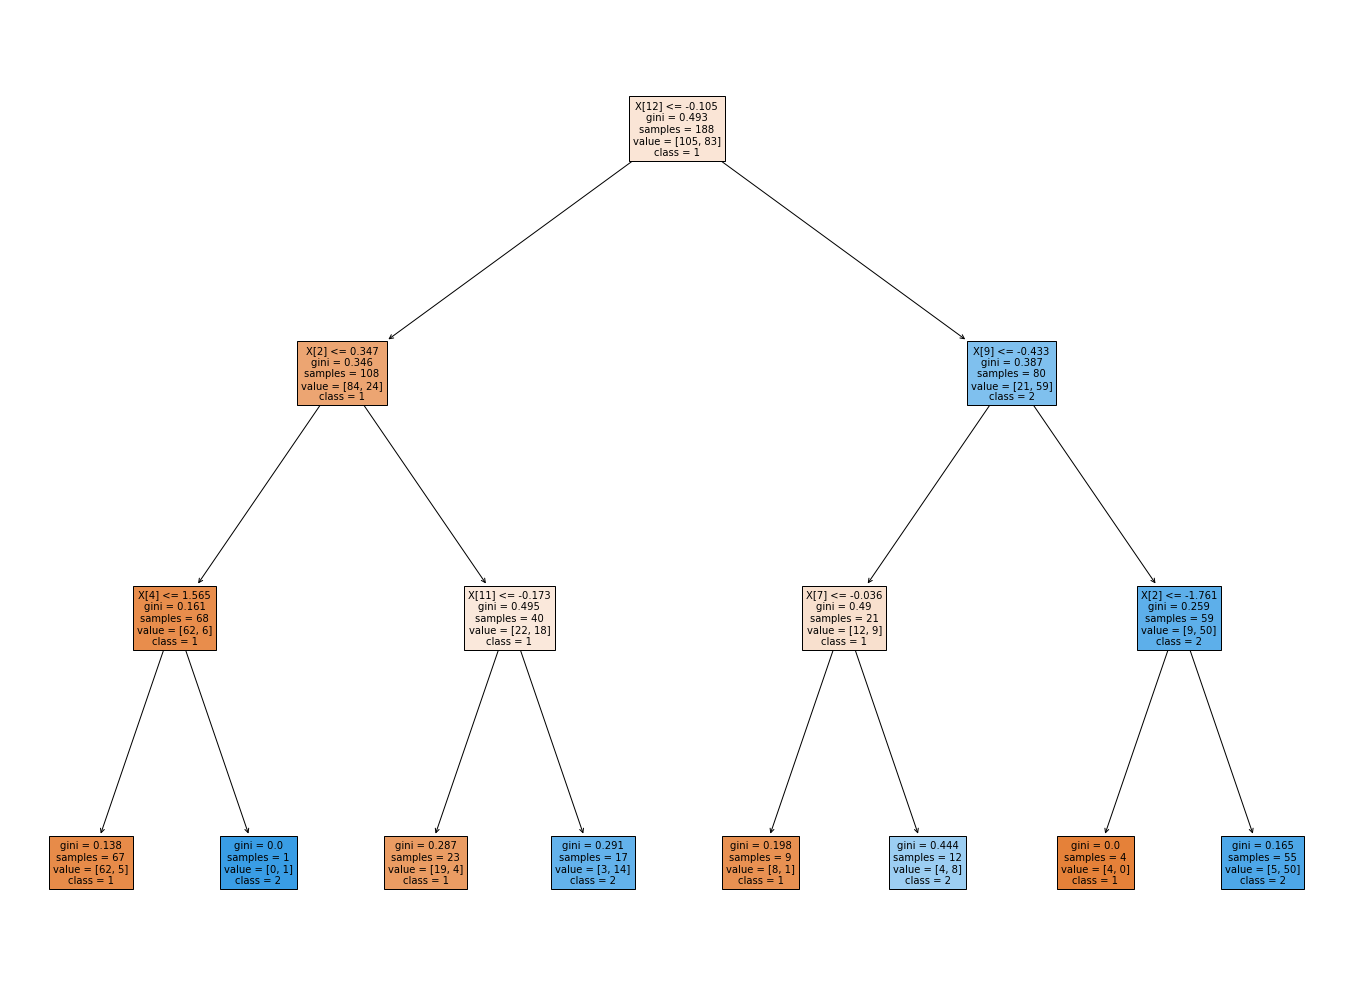

In [7]:
import matplotlib.pyplot as plt
#affichage de l'arbre
plt.figure(figsize=(24,18))
tree.plot_tree(clf.best_estimator_,fontsize=10, filled=True,class_names=['1','2'])
plt.show()

## Résultats:

### Matrice de confusion:
Une Confusion Matrix (matrice de confusion) ou tableau de contingence est un outil permettant de mesurer les performances d’un modèle de Machine Learning en vérifiant notamment à quelle fréquence ses prédictions sont exactes par rapport à la réalité dans des problèmes de classification.  
Chaque ligne du tableau correspond à une classe prédite, et chaque colonne correspond à une classe réelle.  
0 : absence de la maladie.  
1 : présence de la maladie.

|        |   | Classe réelle |    |
|--------|---|-------------- | ---|
|        |   | 0             | 1  |
| classe | 0 | vrais négatifs(TN) | faux négatifs(FN) |
| prédite| 1 | faux positifs(FP)  | vrais positifs(TP)|


Matrice de confusion: 




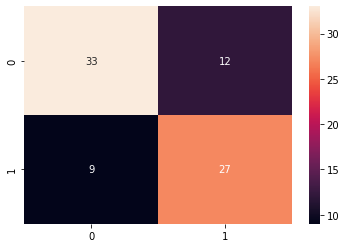

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("Matrice de confusion: ")
print()       
y_pred = clf.best_estimator_.predict(X_test)
cf_matrix_test = confusion_matrix(Y_test, y_pred)
sns.heatmap(cf_matrix_test, annot=True)
print()

il est possible de dériver de nombreux critères d$'$évaluation :  
**Rappel**:(recall en anglais), ou sensibilité
le taux de vrais positifs, c'est-à-dire la proportion d'exemples positifs correctement identifiés:  
$ Rappel = \frac{TP}{TP+FN}$  
**Précision**: ou valeur positive prédictive
la proportion de prédictions correctes parmi les prédictions positives:  
$ Précision = \frac{TP}{TP+FP}$   
**F-mesure**:(f-score ou f1-score)
la moyenne harmonique de la précision et du rappel:  
$ F= 2* \frac{Précision * Rappel}{Précision + Rappel } = \frac{2TP}{2TP+FP+FN} $  


In [9]:
 #prediction: se rapproche le plus possible des données
#le rapport de la classification 
y_pred = clf.best_estimator_.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.73      0.76        45
           2       0.69      0.75      0.72        36

    accuracy                           0.74        81
   macro avg       0.74      0.74      0.74        81
weighted avg       0.74      0.74      0.74        81



### Mesure d'impureté par l'entropie de Shannon :

In [10]:
params = {"max_depth": np.arange(3, 15)} 
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy',random_state=0),params,cv=5, scoring="accuracy")
clf.fit(X_train, Y_train.values.ravel()) 
print(clf.best_estimator_)
print()
print("le meilleur score ",clf.best_score_)

print("Résultats de validation sur l'ensemble des paramètres: ")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()   



accuracyTreeReel=clf.best_estimator_.score(X_test,Y_test)
accuracyTreeTrain=clf.best_estimator_.score(X_train,Y_train)

print("accuracy arbre test:",accuracyTreeReel)
print("accuracy arbre train:",accuracyTreeTrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

le meilleur score  0.8401137980085348
Résultats de validation sur l'ensemble des paramètres: 

0.840 (+/-0.086) for {'max_depth': 3}
0.825 (+/-0.169) for {'max_depth': 4}
0.798 (+/-0.137) for {'max_depth': 5}
0.814 (+/-0.135) for {'max_depth': 6}
0.803 (+/-0.157) for {'max_depth': 7}
0.792 (+/-0.149) for {'max_depth': 8}
0.792 (+/-0.149) for {'max_depth': 9}
0.792 (+/-0.149) for {'max_depth': 10}
0.792 (+/-0.149) for {'max_depth': 11}
0.792 (+/-0.149) for {'max_depth': 12}
0.792 (+/-0.149) for {'max_depth': 13}
0.792 (+/-0.149) for {'max_depth': 14}

accuracy arbre test: 0.8271604938271605
accuracy arbre train: 0.8670212765957447


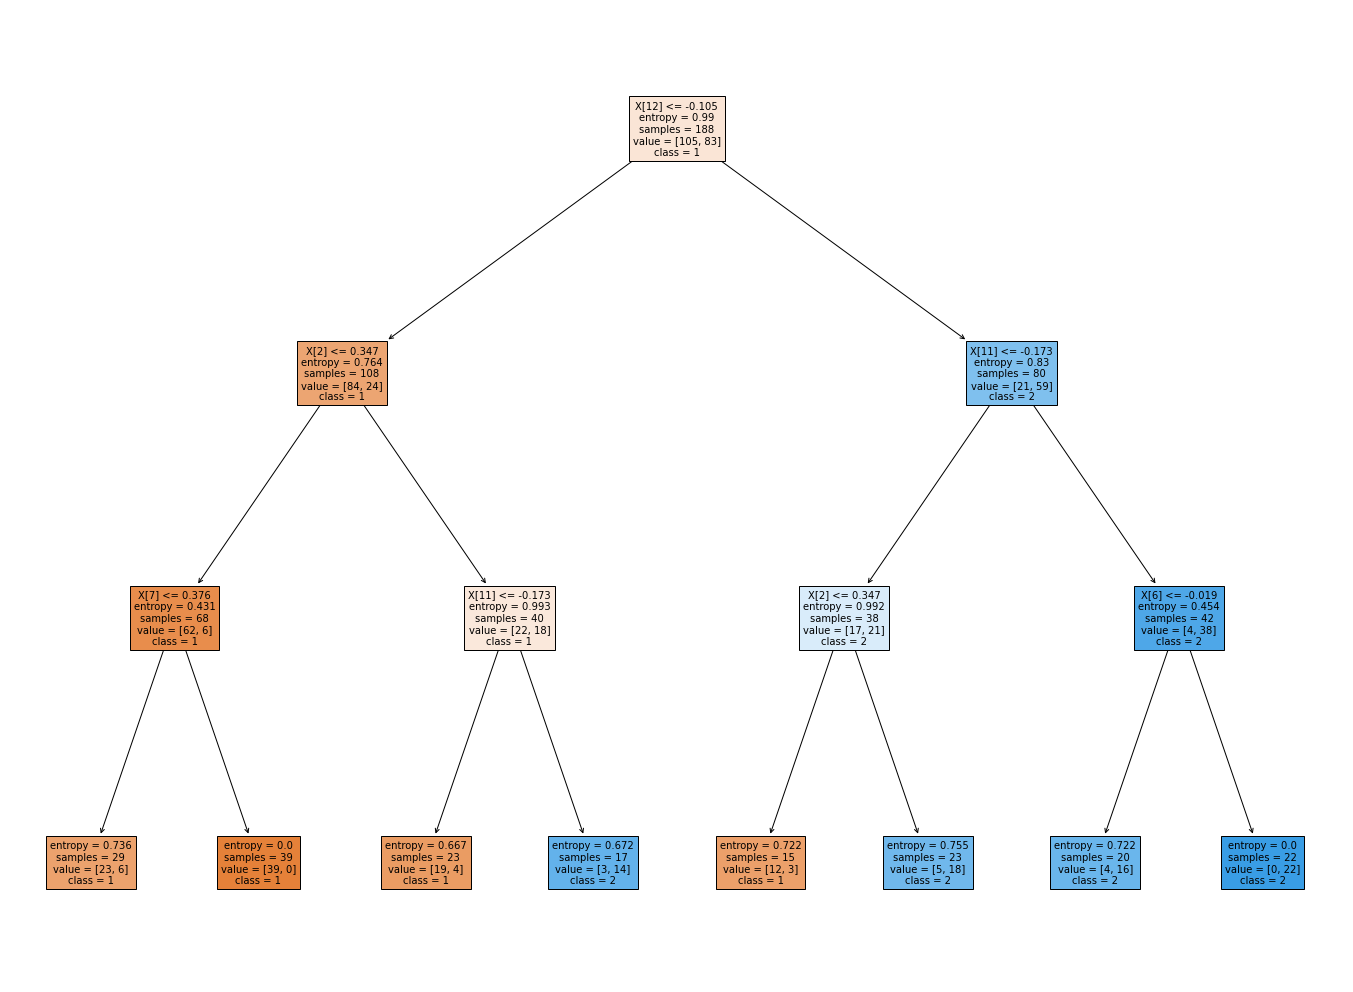

In [11]:
#affichage de l'arbre
plt.figure(figsize=(24,18))
tree.plot_tree(clf.best_estimator_,fontsize=10, filled=True,class_names=['1','2'])
plt.show()

Matrice de confusion: 




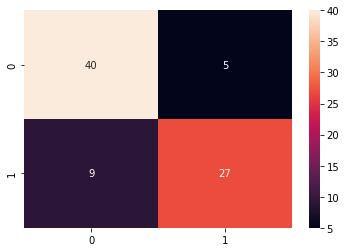

In [12]:
print("Matrice de confusion: ")
print()       
y_pred = clf.best_estimator_.predict(X_test)
cf_matrix_test = confusion_matrix(Y_test, y_pred)
sns.heatmap(cf_matrix_test, annot=True)
print()

In [13]:
#prediction: se rapproche le plus possible des données
#le rapport de la classification 
y_pred = clf.best_estimator_.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.89      0.85        45
           2       0.84      0.75      0.79        36

    accuracy                           0.83        81
   macro avg       0.83      0.82      0.82        81
weighted avg       0.83      0.83      0.83        81



## Analyse comparative:


* Gini : destiné aux attributs continus.  
trouve la classe la plus grande.  
minimise les erreurs de classification.
    
* Entropie: destiné aux attributs qui se produisent dans les classes.  
trouve des groupes de classes qui représentent environ 50 % des données.  
fait pour l'analyse exploratoire

* Complexité: l'entropie est un peu plus lente à calculer(car il inclut la fonction log)

* Les résultats obtenus en utilisant le critère d'entropie sont légèrement meilleurs

* Certaines études montrent que cela n'a pas d'importance - ceux-ci diffèrent moins de 2% du temps.


### Avantages et inconvénients:
$+$ facilement compréhensible par les utilisateurs.  
$+$ offrent une classification rapide et visuelle des données.  
$-$ sensibles au nombre de classes.  
$-$ pas très flexible : si les données changent avec le temps, il faut reconstruire l'arbre de décision.  
`Solution` : les modèles de forêts d’arbres de décision (random decision forest): boosting, bagging, stacking ...